## Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
import pydot
import math
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import sklearn
sklearn.__version__

'0.24.1'

## Read Data

In [3]:
df_data = pd.read_csv('temps.csv')
df_data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
df_data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
print('The shape of our features is:', df_data.shape)

The shape of our features is: (348, 12)


## Plotting Data

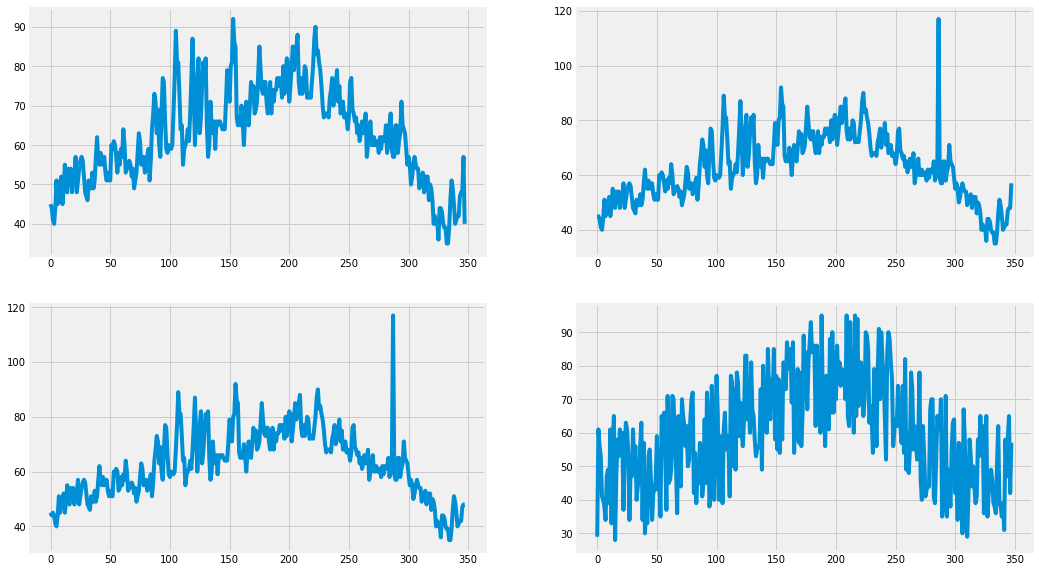

In [7]:
fig,axs = plt.subplots(2,2, figsize = (16,10))
axs[0,0].plot(df_data.actual)
axs[0,1].plot(df_data.temp_1)
axs[1,0].plot(df_data.temp_2)
axs[1,1].plot(df_data.friend)
plt.show()

In [8]:
df_data.week.value_counts()

Tues     52
Sat      50
Fri      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: week, dtype: int64

In [9]:
df_data = pd.get_dummies(df_data)
df_data.shape
df_data.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [10]:
feature_columns = list(df_data.columns)

feature_columns.remove('actual')
y_col = ['actual']

## Test/Train Split

In [11]:
train,test = train_test_split(df_data,test_size = 0.25,random_state =1)
X_train = train.loc[:,feature_columns]
y_train = train.actual
X_test = test.loc[:,feature_columns]
y_test = test.actual
X_train.shape

(261, 17)

## Baseline model

In [12]:
print('Base line MAE', mean_absolute_error(y_test,X_test.average))

Base line MAE 5.748275862068966


## RandomForest

In [13]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [14]:
y_test_pred = rf.predict(X_test)
print('RandomForest MAE', mean_absolute_error(y_test,y_test_pred))

RandomForest MAE 4.451931034482758


In [15]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# RandomCV

In [16]:
df_data = pd.read_csv('temps_extended.csv')
df_data.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2191 non-null   int64  
 1   month    2191 non-null   int64  
 2   day      2191 non-null   int64  
 3   weekday  2191 non-null   object 
 4   ws_1     2191 non-null   float64
 5   prcp_1   2191 non-null   float64
 6   snwd_1   2191 non-null   int64  
 7   temp_2   2191 non-null   int64  
 8   temp_1   2191 non-null   int64  
 9   average  2191 non-null   float64
 10  actual   2191 non-null   int64  
 11  friend   2191 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 205.5+ KB


In [25]:
test_list = np.sort(np.random.randint(1,25,9)).tolist()
test_list


[3, 3, 6, 10, 12, 14, 15, 16, 23]

In [32]:
len(test_list)-1

8

In [120]:
def binary_serach(test_list,val_to_search):
    low = 0
    high = len(test_list) - 1
    mid = (high - low)//2
    while (low <= high):
        if test_list[mid] == val_to_search:
            print('found',mid)
            return 1
        elif test_list[mid] < val_to_search:
            low = mid
            mid = mid + 1
        elif test_list[mid] > val_to_search:
            high = mid
            mid = mid - 1
    return -1

In [127]:
binary_serach(test_list,15)

found 6


1